# 선형회귀

- 아래와 같은 가중치들을 자동으로 계산
  * 공부시간 / 점수 : 두가지를 고려할 경우 <br>
    점수 = 공부시간 * W + b

  * 공부시간 / 학원수강과목 / 점수 : 세가지를 고려할 경우<br>
    점수 = 공부시간 * W1 + 학원수강과목 * W2 +b

## 보스턴 집값 선형회귀

In [2]:
# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 방법 1 : import 부분에 원하는 dataset을 계속 추가
from sklearn.datasets import load_boston, load_digits

boston = load_boston()
dig = load_digits()

# 데이터 로드 방법 2 : datasets까지만 import하고 datasets.~~로 추가
from sklearn import datasets

boston = datasets.load_boston()
dig = datasets.load_digits

In [4]:
import pandas as pd

boston_df = pd.DataFrame(
    boston['data'],
    columns = boston['feature_names']
)
boston_df['price'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# 데이터 분리
X = boston_df.drop(columns = 'price')
y = boston_df['price']

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split 
x_tr, x_te, y_tr,y_te = train_test_split(
    X, y, random_state=0
)

In [6]:
# 선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_tr, y_tr)
print(f'W:{model.coef_}')        # W값은 컬럼 개수만큼 출력
print(f'b:{model.intercept_}')

W:[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
b:36.93325545711978


In [7]:
# 성능점수

print(model.score(x_tr, y_tr))
print(model.score(x_te, y_te))

0.7697699488741149
0.6354638433202124


## 다항회귀

In [8]:
# test점수가 낮아서 점수 항을 위해 다항변환으로 접근
from sklearn.preprocessing import PolynomialFeatures

P = PolynomialFeatures(degree = 2)       # 2차항 추가
X_poly = P.fit_transform(X)
pd.DataFrame(X_poly, columns = P.get_feature_names_out())

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [9]:
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X_poly,y,random_state=0
)
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

0.921654208840289 0.5515683966575164


In [10]:
# 3차항 변환
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False) #2차항 추가
X_poly = P.fit_transform(X)
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X_poly,y,random_state=0
)
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

1.0 -9443.834174676314


In [11]:
# 5차항 변환
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=5, include_bias=False) #2차항 추가
X_poly = P.fit_transform(X)
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X_poly,y,random_state=0
)
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

1.0 -135.30506302849497


## Ridge 회귀 적용(L2 규제)

In [12]:
# Ridge 회귀 적용(L2규제)
# 정규화
from sklearn.preprocessing import MinMaxScaler
X_sc = MinMaxScaler().fit_transform(X)
# 3차항 변환
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False) #2차항 추가
X_poly = P.fit_transform(X_sc)
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X_poly,y,random_state=0
)
#선형회귀
from sklearn.linear_model import Ridge
model = Ridge().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

0.9242749146283598 0.7865342899841115


In [13]:
ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

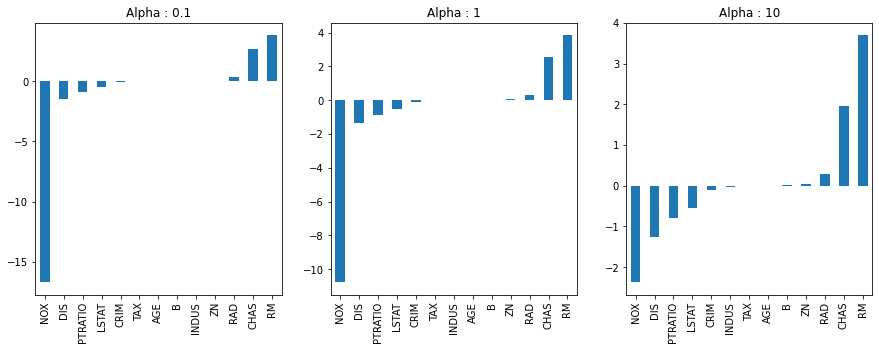

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

## TIP 데이터셋

In [19]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
# ★★★ 원핫인코딩 : 문자열 columns에 대해 0,1 변환
import pandas as pd
tips_ohe = pd.get_dummies(
    tips,
    columns = ['sex', 'smoker', 'day', 'time']
)
tips_ohe

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [27]:
# 분할
y = tips_ohe['tip']
X = tips_ohe.drop(columns = 'tip')

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0
)
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

0.43718265714767135 0.5156604446626071


## 유방암 진단 데이터

In [28]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#
y = cancer["target"]
X = cancer["data"]
#
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0,stratify=y
)
# 모델'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

# 모델'
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )


0.9671361502347418 0.9370629370629371
0.9460093896713615 0.916083916083916


## 타이타닉 데이터 생존율 예측

In [29]:
import seaborn as sns
ti = sns.load_dataset("titanic")

# 결측치 처리를 해주지 않으면 에러 발생
ti["age"] = ti["age"].fillna( ti["age"].mean() )

y = ti["survived"]
X = ti[["age","pclass","sibsp","parch"]]

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0, stratify=y
)
# 모델'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

# 모델'
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

0.7050898203592815 0.6816143497757847
0.7679640718562875 0.672645739910314


## 손글씨 데이터셋

In [30]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

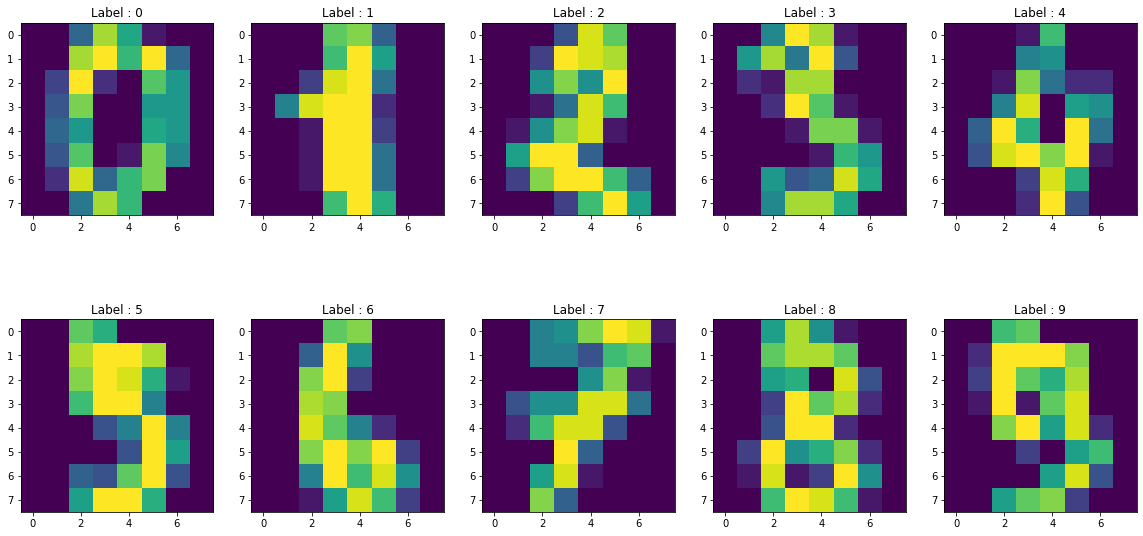

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

# 분류분석 성능평가

In [34]:
# 이진 분류를 위한 데이터세트 준비
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, Y = cancer['data'], cancer['target']

# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [35]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

In [36]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

KNN 정확도 : 93.71%
Logistic Regression 정확도 : 95.80%
Decision Tree 정확도 : 93.01%
Random Forest 정확도 : 96.50%
Gradient Boosting 정확도 : 97.20%
SVM 정확도 : 93.71%
MLP 정확도 : 93.71%


In [37]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

(array([0.        , 0.09803922, 1.        ]),
 array([0.        , 0.95652174, 1.        ]),
 array([2, 1, 0]))

In [38]:
# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

0.9292412617220801

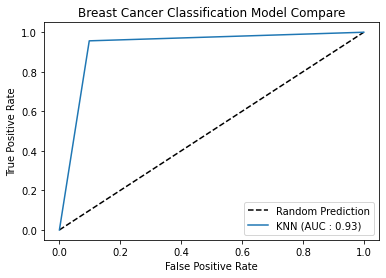

In [39]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

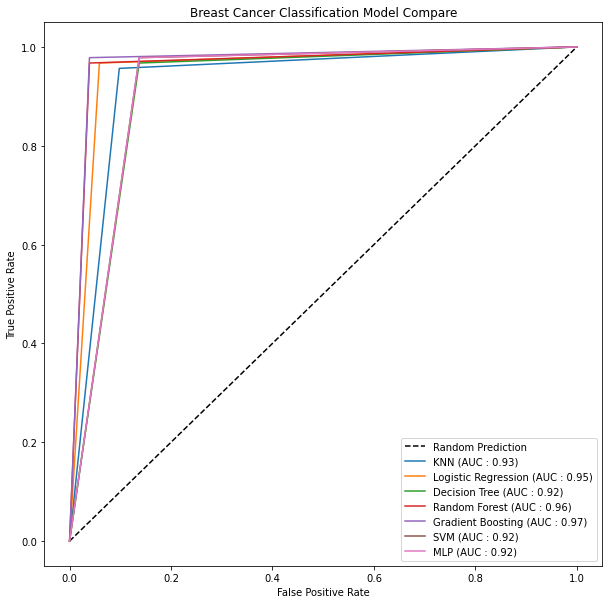

In [40]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

## 타이타닉 데이터셋의 알고리즘 별 분류분석 평가해보기
- 성별도 특성에 포함시키기

In [51]:
import seaborn as sns
ti = sns.load_dataset("titanic")

import pandas as pd
ti_ohe = pd.get_dummies(
    ti,
    columns = ['sex']
)
ti_ohe.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1


In [52]:
ti_ohe["age"] = ti_ohe["age"].fillna( ti_ohe["age"].mean() )

y = ti_ohe["survived"]
X = ti_ohe[["age","pclass","sibsp","parch","sex_female", "sex_male"]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [53]:
# 분류 알고리즘 생성 및 예측
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

In [54]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

(array([0.        , 0.08965517, 1.        ]),
 array([0.        , 0.53846154, 1.        ]),
 array([2, 1, 0], dtype=int64))

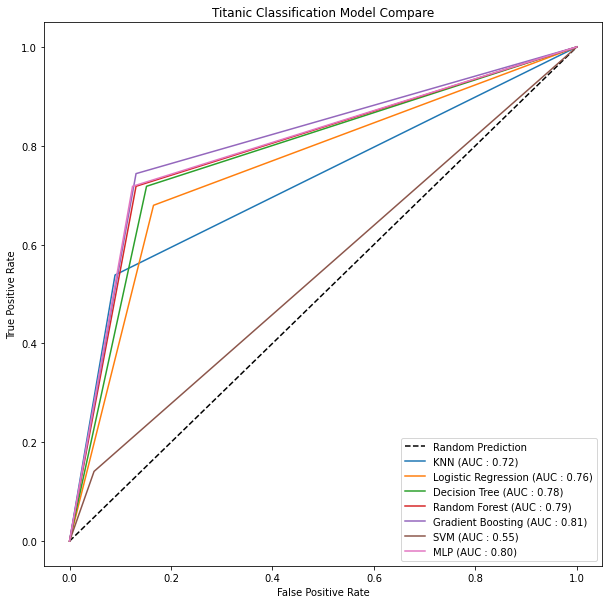

In [55]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()

### 강사님 코드

In [57]:
## 강사님 코드
# 이진 분류를 위한 데이터세트 준비
import seaborn as sns
ti = sns.load_dataset("titanic")

Y = ti["survived"]
X = ti[["pclass","sex","age","sibsp","parch","fare"]]

# age에는 결측치가 있어 반드시 처리해줘야함
X["age"] = X["age"].fillna(X["age"].mean())

import pandas as pd
X = pd.get_dummies(X) # sex문자열을 원핫인코딩으로 변환
X
# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0)

In [58]:
# 분류 알고리즘 생성 및 예측
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

In [59]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

(array([0.        , 0.11510791, 1.        ]),
 array([0.        , 0.47619048, 1.        ]),
 array([2, 1, 0], dtype=int64))

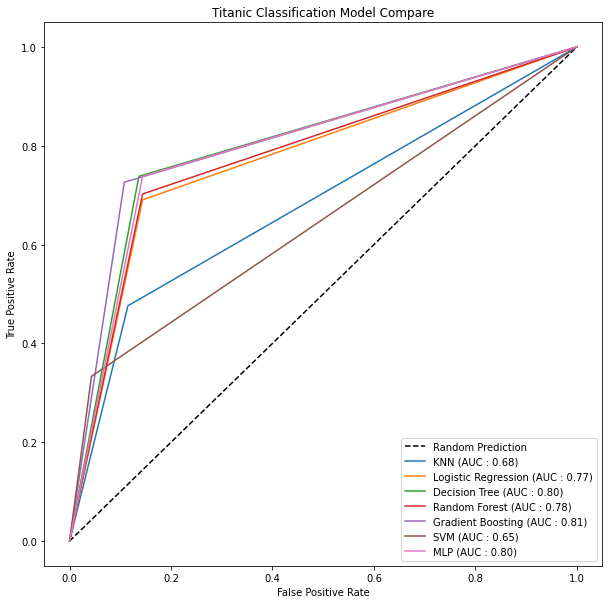

In [60]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()